In [49]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Unify country names

In [50]:
#function to unify country names
country_name_changes = {'Venezuela, RB': 'Venezuela',
'Viet Nam': 'Vietnam',
 'United States of America': 'United States',
 'United Republic of Tanzania': 'Tanzania',
 'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
 'Slovakia': 'Slovak Republic',
 'Saint Lucia': 'St. Lucia',
 'Republic of Moldova': 'Moldova',
 "Democratic People's Republic of Korea":'Korea, Dem. People’s Rep.', 
 'Republic of Korea':'Korea, Rep.',
 'Kyrgyzstan': 'Kyrgyz Republic',
 'Iran (Islamic Republic of)': 'Iran, Islamic Rep.',
 'Gambia': 'Gambia, The',
 'Egypt': 'Egypt, Arab Rep.',
  "Côte d'Ivoire": "Cote d'Ivoire",
 'China, Hong Kong SAR': 'Hong Kong SAR, China',
 'China, Macao SAR':'Macao SAR, China',
 'China, mainland': 'China',
 'Bolivia (Plurinational State of)':'Bolivia',
 'Bahamas, The':'Bahamas',
 'Virgin Islands (U.S.)': 'United States Virgin Islands',
 'Yemen': 'Yemen, Rep.'
}
def change_to_match_name(name):
    if name in country_name_changes.keys():
        return country_name_changes[name]
    else:
        return name

#Get countries

In [51]:
#Obtain list of coutrnies from FAO
countries = pd.read_csv("../raw data/FAO_Consumption.csv")
country_names = countries[["Country Name"]].dropna().drop_duplicates()
country_names

,Country Name
0,Afghanistan
5,Albania
10,Algeria
15,Angola
20,Antigua and Barbuda
...,...
845,Venezuela (Bolivarian Republic of)
850,Viet Nam
855,Yemen
860,Zambia


In [52]:
#Obtain the average country population from 2014-2019
country_population = pd.read_csv("../raw data/country_population.csv")
country_population = country_population[['Country Name', '2014', '2015', '2016', '2017']]
country_population['average'] = country_population[['2014', '2015', '2016', '2017']].mean(axis=1)
country_population = country_population.drop(['2014', '2015', '2016', '2017'], axis=1)
country_population

,Country Name,average
0,Aruba,104588.25
1,Afghanistan,34865981.25
2,Angola,28371348.00
3,Albania,2879841.25
4,Andorra,77880.50
...,...,...
263,Zimbabwe,13917111.25
264,"Yemen, Rep.",26831101.25
265,South Africa,55784115.75
266,Zambia,16124077.25


#Filter countries by gdp

In [53]:
#Obtain gdp data
gdp = pd.read_csv("../raw data/gdp.csv")
median_gdp = 6520.64991860447

#Obtain average GDP from 2014-2017 
gdp_filtered = gdp.melt(id_vars=["Unnamed: 0", "Country Name", "Country Code"], var_name="Year", value_name="GDP")
gdp_filtered = gdp_filtered.loc[gdp_filtered['Year'].isin(['2014', '2015', '2016', '2017'])]
gdp_filtered = gdp_filtered.loc[(gdp_filtered['GDP'] != "..")]
gdp_filtered = gdp_filtered[gdp_filtered['GDP'].notnull()].copy()
gdp_filtered["GDP"] = gdp_filtered["GDP"].astype(float)
gdp_filtered = gdp_filtered.groupby(['Country Name']).mean().reset_index()
gdp_filtered = pd.merge(country_names, gdp_filtered, left_on=['Country Name'], right_on=['Country Name'], how='left')

#Split data on GDP median
gdp_filtered_above = gdp_filtered.loc[(gdp_filtered['GDP'] >= median_gdp)]
gdp_filtered_below = gdp_filtered.loc[(gdp_filtered['GDP'] < median_gdp)]

#Clean country names
gdp_filtered_above["Country Name"] = gdp_filtered_above["Country Name"].apply(change_to_match_name)
gdp_filtered_below["Country Name"] = gdp_filtered_below["Country Name"].apply(change_to_match_name)
gdp_filtered_above = gdp_filtered_above.drop(['Unnamed: 0'], axis=1)
gdp_filtered_below = gdp_filtered_below.drop(['Unnamed: 0'], axis=1)

gdp_filtered_above


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Country Name,GDP
4,Antigua and Barbuda,14592.176681
5,Argentina,13381.785742
7,Australia,55816.402789
8,Austria,47149.721678
12,Barbados,16826.434477
...,...,...
156,Trinidad and Tobago,17743.926068
158,Turkey,11162.595190
159,Turkmenistan,6842.889631
162,United Arab Emirates,40300.468374


In [54]:
gdp_filtered_below

,Country Name,GDP
0,Afghanistan,555.356619
1,Albania,4296.627435
2,Algeria,4434.659564
3,Angola,4294.319002
6,Armenia,3774.964716
...,...,...
161,Ukraine,2514.427928
167,Uzbekistan,2375.431976
168,Vanuatu,2965.601877
172,Zambia,1479.075839


#Depression dataset

In [55]:
#Obtain data on depression count
depression = pd.read_csv("../raw data/depression.csv")

#Clean data to be from 2014-2017
depression_filtered = depression.loc[depression['Year'].isin(['2014', '2015', '2016', '2017'])]
depression_filtered = depression_filtered[depression_filtered['Year'].notnull()].copy()
depression_filtered["Year"] = depression_filtered["Year"].astype(str)
depression_filtered["Country Name"] = depression_filtered["Country Name"].apply(change_to_match_name)
depression_filtered = depression_filtered.groupby(['Country Name']).mean().reset_index()
depression_filtered = depression_filtered.drop(['Unnamed: 0'], axis=1)

depression_filtered

,Country Name,Depression Count
0,Afghanistan,9.225020e+05
1,Albania,6.930178e+04
2,Algeria,1.362142e+06
3,American Samoa,1.463210e+03
4,Andean Latin America,1.449653e+06
...,...,...
226,Western Sub-Saharan Africa,1.091758e+07
227,World,2.584092e+08
228,"Yemen, Rep.",9.131212e+05
229,Zambia,4.082987e+05


#Clean depression df

In [56]:
depression_filtered

,Country Name,Depression Count
0,Afghanistan,9.225020e+05
1,Albania,6.930178e+04
2,Algeria,1.362142e+06
3,American Samoa,1.463210e+03
4,Andean Latin America,1.449653e+06
...,...,...
226,Western Sub-Saharan Africa,1.091758e+07
227,World,2.584092e+08
228,"Yemen, Rep.",9.131212e+05
229,Zambia,4.082987e+05


In [57]:
country_population

,Country Name,average
0,Aruba,104588.25
1,Afghanistan,34865981.25
2,Angola,28371348.00
3,Albania,2879841.25
4,Andorra,77880.50
...,...,...
263,Zimbabwe,13917111.25
264,"Yemen, Rep.",26831101.25
265,South Africa,55784115.75
266,Zambia,16124077.25


In [58]:
#merge table columns
temp_df = pd.merge(depression_filtered, country_population, right_on=['Country Name'], left_on=['Country Name'], how="left")
temp_df

,Country Name,Depression Count,average
0,Afghanistan,9.225020e+05,34865981.25
1,Albania,6.930178e+04,2879841.25
2,Algeria,1.362142e+06,40148078.50
3,American Samoa,1.463210e+03,55741.00
4,Andean Latin America,1.449653e+06,NaN
...,...,...,...
230,"Yemen, Rep.",9.131212e+05,26831101.25
231,Zambia,4.082987e+05,16124077.25
232,Zambia,4.082987e+05,16124077.25
233,Zimbabwe,3.258312e+05,13917111.25


In [59]:
#divide depression count by average pop
depression_filtered['Depression Count'] = depression_filtered['Depression Count'].div(temp_df['average'], axis=0)
depression_filtered

,Country Name,Depression Count
0,Afghanistan,0.026459
1,Albania,0.024064
2,Algeria,0.033928
3,American Samoa,0.026250
4,Andean Latin America,NaN
...,...,...
226,Western Sub-Saharan Africa,NaN
227,World,NaN
228,"Yemen, Rep.",0.000124
229,Zambia,0.015217


In [60]:
#fill na with the mode
depression_filtered.fillna(depression_filtered["Depression Count"].mode()[0], inplace = True)
depression_filtered

,Country Name,Depression Count
0,Afghanistan,0.026459
1,Albania,0.024064
2,Algeria,0.033928
3,American Samoa,0.026250
4,Andean Latin America,0.000011
...,...,...
226,Western Sub-Saharan Africa,0.000011
227,World,0.000011
228,"Yemen, Rep.",0.000124
229,Zambia,0.015217


#Correlation for depression and gdp for countries above the average GDP

In [61]:
#Merge cleaned depression data with clean above median GDP data
gdp_depress_above = pd.merge(gdp_filtered_above, depression_filtered, left_on=['Country Name'], right_on=['Country Name'], how="left")
gdp_depress_above

,Country Name,GDP,Depression Count
0,Antigua and Barbuda,14592.176681,0.025517
1,Argentina,13381.785742,0.035681
2,Australia,55816.402789,0.044393
3,Austria,47149.721678,0.036770
4,Barbados,16826.434477,0.032193
...,...,...,...
60,Trinidad and Tobago,17743.926068,0.484131
61,Turkey,11162.595190,0.264922
62,Turkmenistan,6842.889631,0.001575
63,United Arab Emirates,40300.468374,0.007079


In [62]:
#Merge cleaned depression data with clean below median GDP data
gdp_depress_below = pd.merge(gdp_filtered_below, depression_filtered, left_on=['Country Name'], right_on=['Country Name'], how="left")
gdp_depress_below

,Country Name,GDP,Depression Count
0,Afghanistan,555.356619,0.026459
1,Albania,4296.627435,0.024064
2,Algeria,4434.659564,0.033928
3,Angola,4294.319002,0.027714
4,Armenia,3774.964716,0.031653
...,...,...,...
75,Ukraine,2514.427928,0.058049
76,Uzbekistan,2375.431976,0.239217
77,Vanuatu,2965.601877,0.000222
78,Zambia,1479.075839,0.015217


#Correlation for depression and GDP for countries above the average GDP

##Scatter plots

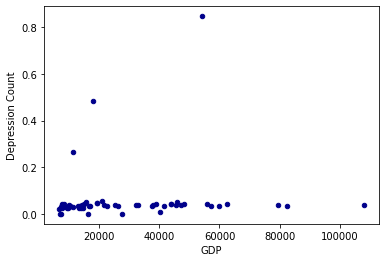

In [63]:
#plot above GDP median and depression count
ax1 = gdp_depress_above.plot.scatter(x='GDP', y='Depression Count', c='DarkBlue')

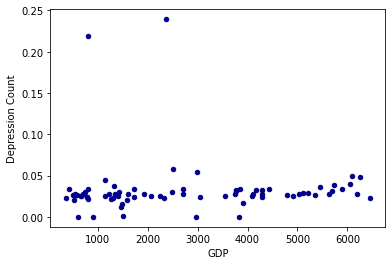

In [64]:
#plot below GDP median and depression count
ax2 = gdp_depress_below.plot.scatter(x='GDP', y='Depression Count', c='DarkBlue')

##Correlation values

In [65]:
#obtain correlation of above GDP median and depression count
corr = gdp_depress_above.corr(method="spearman")
corr.loc['Depression Count']

GDP                 0.446044
Depression Count    1.000000
Name: Depression Count, dtype: float64

In [66]:
#obtain correlation of below GDP median and depression count
corr = gdp_depress_below.corr(method="spearman")
corr.loc['Depression Count']

GDP                 0.293271
Depression Count    1.000000
Name: Depression Count, dtype: float64